<a href="https://colab.research.google.com/github/velavalururajithasai/ml_dl/blob/master/EXERCISE_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#Importing MNIST dataset
from keras.datasets import mnist
# The np_utils module provides utilities for converting data types and manipulating arrays.
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [63]:
#load_data : unpacks the data into tuples : (X_train, y_train) and (X_test, y_test)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [64]:
print(X_train[1].shape)

(28, 28)


In [65]:
#shape : helps to view the dimensions of the numpy array
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [66]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


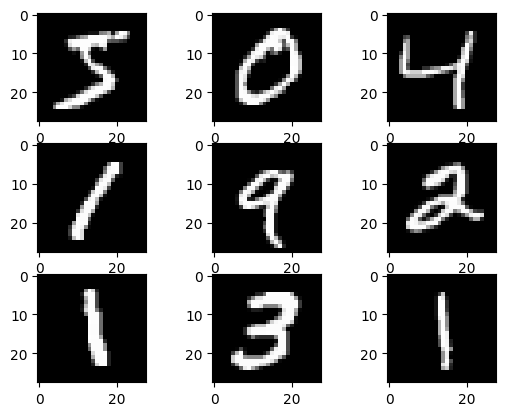

In [67]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [68]:
#convert 2d to 1d
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [69]:
#shape : helps to view the dimensions of the input array
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [70]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [71]:
#pixel values are typically represented as integers between 0 and 255,
#where 0 represents black and 255 represents white.
X_train = X_train/255
X_test = X_test/255

In [72]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [73]:
#Preprocessing
print("Class label of first image :", y_train[0])

Class label of first image : 5


In [74]:
#One-hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [75]:
print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [76]:
#Building a model
from keras.models import Sequential
from keras.layers import Dense, Activation

In [77]:
#input_dim : number of features(columns) in the input data
#output_dim : there are 10 possible output classes, corresponding to the digits 0 to 9.
input_dim = X_train.shape[1] #784
output_dim = 10 #0-9

In [78]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
#Fitting the model
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2838 - accuracy: 0.7012 - val_loss: 0.8135 - val_accuracy: 0.8325
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7159 - accuracy: 0.8421 - val_loss: 0.6076 - val_accuracy: 0.8639
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5865 - accuracy: 0.8610 - val_loss: 0.5254 - val_accuracy: 0.8744
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.8694 - val_loss: 0.4797 - val_accuracy: 0.8810
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.8756 - val_loss: 0.4498 - val_accuracy: 0.8853
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4613 - accuracy: 0.8803 - val_loss: 0.4284 - val_accuracy: 0.8885
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.8842 - val_loss: 0.4124 - val_accuracy: 0.8909
Epoch 

In [80]:
#evaluates the trained neural network model on the testing data (X_test and Y_test)
#prints the test score and accuracy
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3355656564235687
Test accuracy: 0.9072999954223633


313/313 [==============================] - 0s 886us/step
[5.4483413e-04 7.2444868e-07 2.4850602e-04 1.4566167e-01 6.8365014e-04
 8.0256963e-01 2.1104841e-04 4.6433729e-06 4.9785748e-02 2.8942930e-04]
5


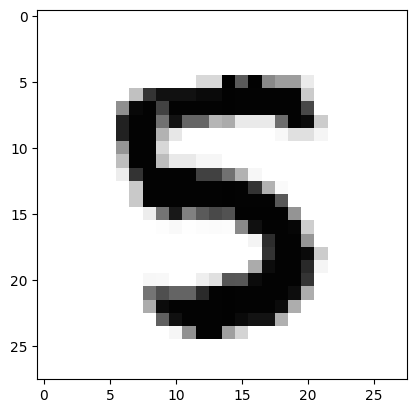

In [81]:
image_index = 120
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [82]:
#constants for readability
NB_EPOCHS = 20
BATCH_SIZE = 128

In [83]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))
model_sigmoid.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 128)               65664     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [84]:
#MLP+Sigmoid+ADAM optimizer
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5584 - accuracy: 0.8534 - val_loss: 0.2561 - val_accuracy: 0.9256
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2237 - accuracy: 0.9350 - val_loss: 0.1821 - val_accuracy: 0.9458
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1643 - accuracy: 0.9513 - val_loss: 0.1554 - val_accuracy: 0.9559
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1263 - accuracy: 0.9627 - val_loss: 0.1199 - val_accuracy: 0.9644
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0996 - accuracy: 0.9704 - val_loss: 0.0999 - val_accuracy: 0.9680
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0793 - accuracy: 0.9765 - val_loss: 0.0886 - val_accuracy: 0.9719
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0643 - accuracy: 0.9804 - val_loss: 0.0773 - val_accuracy: 0.9752
Epoch 

In [85]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3355656564235687
Test accuracy: 0.9072999954223633


313/313 [==============================] - 1s 2ms/step
[1.9846109e-11 9.3849162e-10 5.9491789e-10 9.9999982e-01 7.6472119e-12
 7.7966590e-08 1.6649522e-14 9.8375974e-10 8.9083180e-10 5.0093430e-08]
3


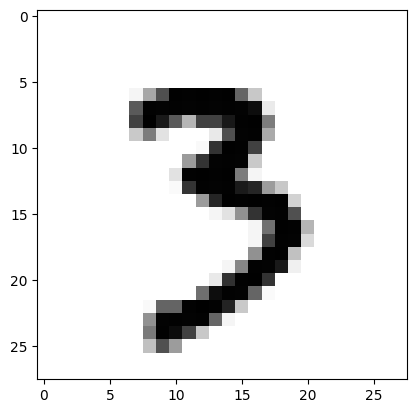

In [86]:
image_index = 30
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_sigmoid.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [87]:
#MLP+ReLu Activation+ADAM optimizer
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 128)               65664     
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [88]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0731 - val_accuracy: 0.9818
Epoch 2/20
469/469 [==============================] - 4s 7ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0684 - val_accuracy: 0.9826
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0703 - val_accuracy: 0.9826
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0785 - val_accuracy: 0.9819
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0804 - val_accuracy: 0.9818
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0811 - val_accuracy: 0.9813
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0762 - val_accuracy: 0.9836
Epoch 

313/313 [==============================] - 1s 2ms/step
[0.08039144 0.13072622 0.11108375 0.1498082  0.08756096 0.06463279
 0.06944329 0.1529597  0.07887384 0.07451972]
7


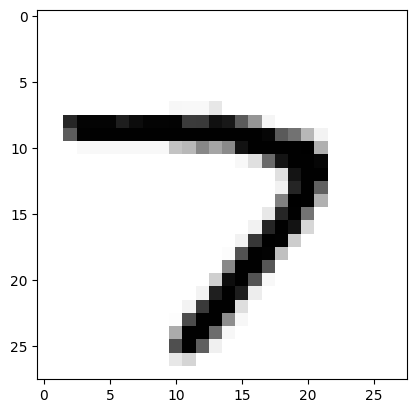

In [107]:
image_index = 70
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_relu.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [94]:
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
with strategy.scope():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(16))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))
model_sigmoid.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               401920    
                                                                 
 dense_32 (Dense)            (None, 128)               65664     
                                                                 
 dense_33 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 1s 2ms/step
[0.17406401 0.08107704 0.04129263 0.17426497 0.1164889  0.1349537
 0.12112977 0.0181935  0.10065027 0.03788521]
3


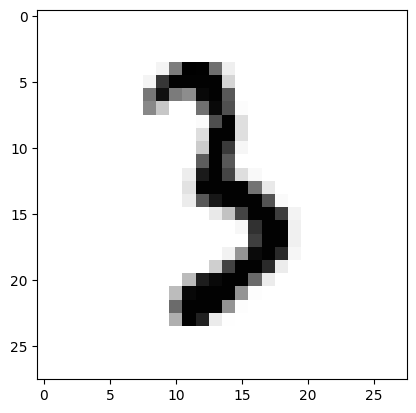

In [118]:
image_index = 44
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_sigmoid.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))